In [76]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [77]:
sess = tf.Session()

In [78]:
# Various Predicted X-values
x_vals = tf.linspace(-1., 1., 500)

# Create our target of zero
target = tf.constant(0.)

In [79]:
# L2 loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

In [80]:
# L1 loss
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

In [81]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)

# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

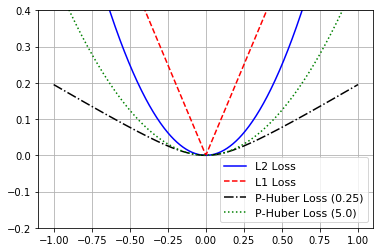

In [82]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()